In [9]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
H = Herbie("2025-09-25 18:00", 
           model="rtma", 
           product="anl"
)

✅ Found ┊ model=rtma ┊ product=anl ┊ 2021-Jul-19 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [11]:
# Show available products
H.PRODUCTS

{'anl': 'Analysis',
 'err': 'Analysis Forecast Error',
 'ges': 'Forecasts',
 'pcp': 'Precipitation Field'}

In [12]:
H.SOURCES

{'aws': 'https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20210719/rtma2p5.t18z.2dvaranl_ndfd.grb2_wexp',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rtma/prod/rtma2p5.20210719/rtma2p5.t18z.2dvaranl_ndfd.grb2_wexp'}

In [13]:
H.download(verbose=True)  # verbose will show you download progress

👨🏻‍🏭 Created directory: [/Users/john_b_needham/data/rtma/20210719]
✅ Success! Downloaded RTMA from aws                 
	src: https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20210719/rtma2p5.t18z.2dvaranl_ndfd.grb2_wexp
	dst: /Users/john_b_needham/data/rtma/20210719/rtma2p5.t18z.2dvaranl_ndfd.grb2_wexp


PosixPath('/Users/john_b_needham/data/rtma/20210719/rtma2p5.t18z.2dvaranl_ndfd.grb2_wexp')

In [14]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,7490117.0,0-7490117,2021-07-19 18:00:00,2021-07-19 18:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,7490118,14980235.0,7490118-14980235,2021-07-19 18:00:00,2021-07-19 18:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,14980236,21065992.0,14980236-21065992,2021-07-19 18:00:00,2021-07-19 18:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,21065993,27151749.0,21065993-27151749,2021-07-19 18:00:00,2021-07-19 18:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,27151750,33237506.0,27151750-33237506,2021-07-19 18:00:00,2021-07-19 18:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,33237507,39323263.0,33237507-39323263,2021-07-19 18:00:00,2021-07-19 18:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,39323264,46345261.0,39323264-46345261,2021-07-19 18:00:00,2021-07-19 18:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,46345262,51962897.0,46345262-51962897,2021-07-19 18:00:00,2021-07-19 18:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,51962898,57580533.0,51962898-57580533,2021-07-19 18:00:00,2021-07-19 18:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,57580534,63198169.0,57580534-63198169,2021-07-19 18:00:00,2021-07-19 18:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [15]:
ds = H.xarray("TMP:2 m")
ds

<xarray.Dataset> Size: 75MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2021-07-19T18:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2021-07-19T18:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB 295.9 295.9 295.9 ... 288.0 287.7
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /Users/john_b_needham/data/rtma/20210719/rtma2p5...
    local_grib:              /Users/john_b_needham/data/rtma/20210719/subset_...
    search:                  TMP:2 m

Text(1.0, 1.0, '2 metre temperature')

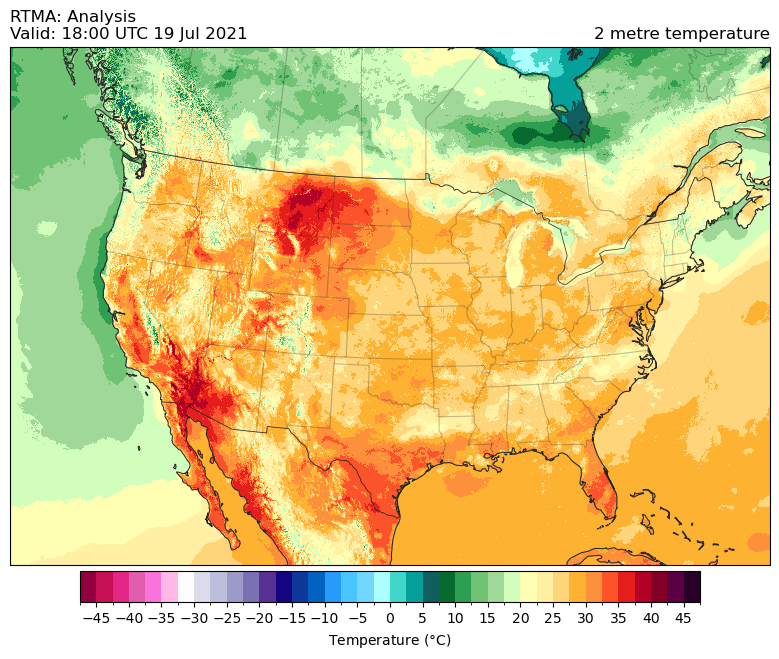

In [16]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSTemperature.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")